In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report


In [29]:
df = pd.read_csv('diabetes.csv')

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df1 = ['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness']
for i in df1:
    df[i].replace(0, df[i].mean(), inplace = True)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df2 = ['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction', 'Age']
for i in df2:
    t = df[i].quantile(.98)
    df1 = df[df[i]<t]

In [39]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.827128,121.354352,72.107162,26.700535,119.513315,32.509609,0.472399,32.500000,0.351064
std,3.382324,30.265682,12.059176,9.684704,93.877922,6.883773,0.333336,10.702862,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.600000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,64.000000,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_1184\223481088.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[i])
C:\Users\hp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_1184\223481088.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot`

[]

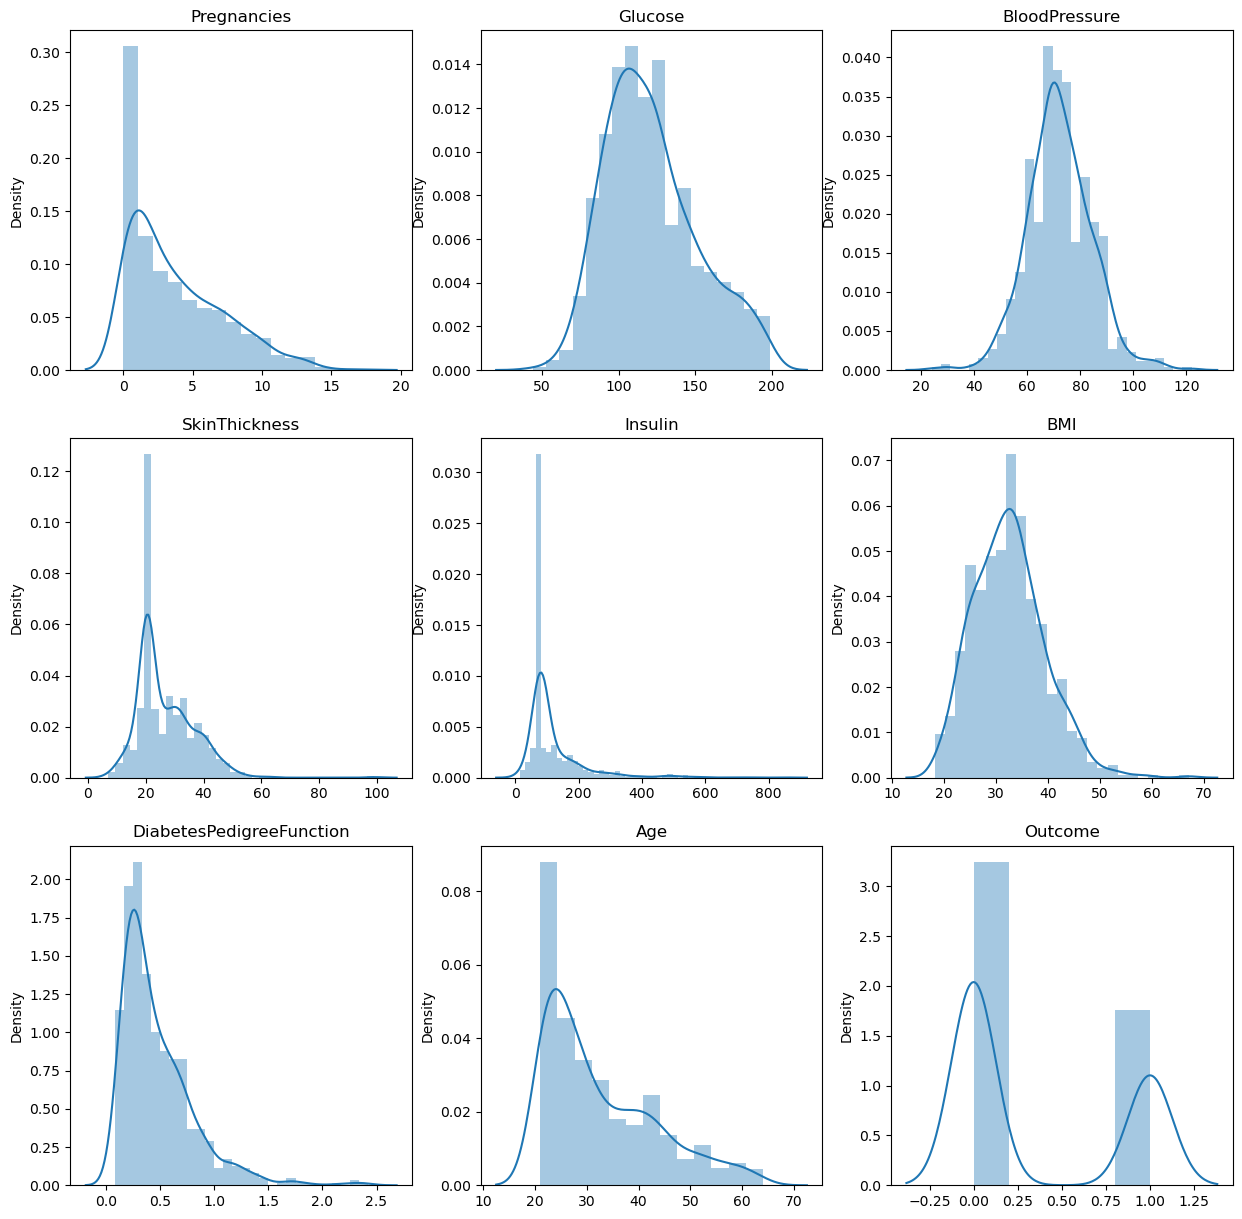

In [41]:
plt.figure(figsize = (15,15))
for i in df1:
    plt.subplot(3,3,df1.columns.get_loc(i)+1)
    sns.distplot(x = df1[i])
    plt.title(i)
plt.plot()
    

In [42]:
x = df1.drop(columns = ['Outcome'])
y = df1['Outcome']

In [43]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [44]:
x_scaled

array([[ 0.6428475 ,  0.88097742, -0.00889227, ...,  0.15850566,
         0.46410774,  1.63616484],
       [-0.83640991, -1.20197351, -0.50676983, ..., -0.85905533,
        -0.36443595, -0.1402427 ],
       [ 1.23455047,  2.03817239, -0.67272902, ..., -1.33876265,
         0.59919639, -0.04674757],
       ...,
       [ 0.34699602, -0.01171584, -0.00889227, ..., -0.91720167,
        -0.68264476, -0.23373783],
       [-0.83640991,  0.15359773, -1.00464739, ..., -0.35027484,
        -0.37043989,  1.35567944],
       [-0.83640991, -0.93747181, -0.17485146, ..., -0.30666508,
        -0.47250687, -0.88820377]])

In [53]:
vif = pd.DataFrame()
vif['vif']= [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns

In [51]:
vif

,vif,features
0,1.544600,Pregnancies
1,1.353891,Glucose
2,1.239703,BloodPressure
3,1.453554,SkinThickness
4,1.270203,Insulin
5,1.545731,BMI
6,1.059851,DiabetesPedigreeFunction
7,1.727013,Age


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 42)

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [57]:
model.fit(x_train,y_train)

GaussianNB()

In [59]:
ytest_p = model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
print(accuracy_score(y_test,ytest_p))

0.7446808510638298


In [62]:
cm = confusion_matrix(y_test,ytest_p)

In [63]:
cm

array([[99, 24],
       [24, 41]], dtype=int64)

In [66]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[1,0]
fn = cm[0,1]

In [74]:
accuracy = (tp + tn)/(tp+tn+fp+fn)

In [75]:
accuracy

0.7446808510638298

In [76]:
recall = tp/(tp+fn)

In [89]:
recall

0.8048780487804879

In [90]:
fpr,tpr,thresholds = roc_curve(y_test,ytest_p)
auc = roc_auc_score(y_test,ytest_p)

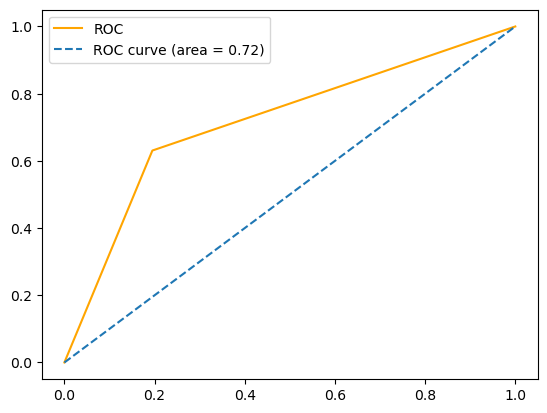

In [91]:
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], linestyle= '--', label = 'ROC curve (area = %0.2f)' % auc)
plt.legend()
plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()
model1 = lr.fit(x_train,y_train)

In [94]:
ytest_pr = model1.predict(x_test)

In [95]:
accuracy1 = accuracy_score(y_test,ytest_pr)

In [96]:
accuracy1

0.7446808510638298

In [97]:
cm1 = confusion_matrix(y_test,ytest_pr)

In [98]:
cm1

array([[105,  18],
       [ 30,  35]], dtype=int64)

In [100]:
report = classification_report(y_test,ytest_p)

In [102]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.63      0.63      0.63        65

    accuracy                           0.74       188
   macro avg       0.72      0.72      0.72       188
weighted avg       0.74      0.74      0.74       188



In [103]:
report1 = classification_report(y_test,ytest_pr)

In [104]:
print(report1)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.66      0.54      0.59        65

    accuracy                           0.74       188
   macro avg       0.72      0.70      0.70       188
weighted avg       0.74      0.74      0.74       188

